# Explore Census Data

In [48]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore')

### Explore population data

In [49]:
#read population census data in
pop_in = pd.read_csv('data/2018-pop-estimates.csv', encoding = "ISO-8859-1")

In [50]:
pop_in.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017,respop72018
0,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018
1,0500000US01001,01001,"Autauga County, Alabama",54571,54574,54754,55208,54936,54713,54876,54838,55242,55443,55601
2,0500000US01003,01003,"Baldwin County, Alabama",182265,182264,183111,186540,190143,194886,199189,202995,207712,212619,218022
3,0500000US01005,01005,"Barbour County, Alabama",27457,27457,27330,27350,27174,26944,26758,26294,25819,25158,24881
4,0500000US01007,01007,"Bibb County, Alabama",22915,22920,22872,22747,22664,22516,22541,22562,22576,22555,22400


In [51]:
# after inpsecting the data, I need the first row as the header
pop_in = pd.read_csv('data/2018-pop-estimates.csv', encoding = "ISO-8859-1", header=1)

In [52]:
pop_in.head()

,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018
0,0500000US01001,1001,"Autauga County, Alabama",54571,54574,54754,55208,54936,54713,54876,54838,55242,55443,55601
1,0500000US01003,1003,"Baldwin County, Alabama",182265,182264,183111,186540,190143,194886,199189,202995,207712,212619,218022
2,0500000US01005,1005,"Barbour County, Alabama",27457,27457,27330,27350,27174,26944,26758,26294,25819,25158,24881
3,0500000US01007,1007,"Bibb County, Alabama",22915,22920,22872,22747,22664,22516,22541,22562,22576,22555,22400
4,0500000US01009,1009,"Blount County, Alabama",57322,57321,57373,57554,57570,57611,57521,57522,57517,57827,57840


For population data, I'll really only need the GeoId column to use to join to a county shapefile, and the last column that contains the most recent population estimates.

In [53]:
# drop extra columns, I will keep both 2017 and 2018 population estimates for now because
# some of the most recent census datasets are from 2017, so I wonder if it is best to keep the year 2017 consistent
population = pop_in[['Id', 'Id2', 'Geography', 'Population Estimate (as of July 1) - 2017', 'Population Estimate (as of July 1) - 2018']]
population.sample(5)

,Id,Id2,Geography,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018
1897,0500000US37015,37015,"Bertie County, North Carolina",19274,19026
1200,0500000US24017,24017,"Charles County, Maryland",159451,161503
636,0500000US17083,17083,"Jersey County, Illinois",21901,21847
9,0500000US01019,1019,"Cherokee County, Alabama",25815,26032
1351,0500000US27075,27075,"Lake County, Minnesota",10516,10658


In [54]:
# rename columns
population = population.rename(columns={'Geography': 'name',
                                        'Population Estimate (as of July 1) - 2017': '2017_pop',
                                        'Population Estimate (as of July 1) - 2018': '2018_pop'})
population.head()

,Id,Id2,name,2017_pop,2018_pop
0,0500000US01001,1001,"Autauga County, Alabama",55443,55601
1,0500000US01003,1003,"Baldwin County, Alabama",212619,218022
2,0500000US01005,1005,"Barbour County, Alabama",25158,24881
3,0500000US01007,1007,"Bibb County, Alabama",22555,22400
4,0500000US01009,1009,"Blount County, Alabama",57827,57840


### Explore age group data

In [55]:
age_in = pd.read_csv('data/2018-age-populations.csv', encoding = "ISO-8859-1", header=1)

In [56]:
age_in.head()

,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; Total","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Both Sexes; Total,...,Population Estimate (as of July 1) - 2015 - Female; Median age (years),Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2016 - Male; Median age (years),Population Estimate (as of July 1) - 2016 - Female; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Male; Median age (years),Population Estimate (as of July 1) - 2017 - Female; Median age (years),Population Estimate (as of July 1) - 2018 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2018 - Male; Median age (years),Population Estimate (as of July 1) - 2018 - Female; Median age (years)
0,0500000US01001,1001,"Autauga County, Alabama",54571,26569,28002,54574,26571,28003,54754,...,39.8,38.7,37.2,40.0,38.8,37.5,40.1,39.1,37.7,40.5
1,0500000US01003,1003,"Baldwin County, Alabama",182265,89196,93069,182264,89196,93068,183111,...,43.4,42.8,41.7,43.7,43.0,41.9,44.1,43.3,42.1,44.4
2,0500000US01005,1005,"Barbour County, Alabama",27457,14576,12881,27457,14576,12881,27330,...,43.1,40.3,38.2,43.5,40.9,38.6,44.3,40.9,38.7,44.7
3,0500000US01007,1007,"Bibb County, Alabama",22915,12301,10614,22920,12304,10616,22872,...,42.1,39.7,37.8,42.4,39.8,37.9,42.5,40.0,38.2,42.7
4,0500000US01009,1009,"Blount County, Alabama",57322,28362,28960,57321,28361,28960,57373,...,41.7,40.9,39.8,41.8,40.8,39.8,41.7,40.9,39.9,41.9


In [57]:
age_groups = age_in.copy()
list(age_groups.columns)

['Id',
 'Id2',
 'Geography',
 'April 1, 2010 - Census - Both Sexes; Total',
 'April 1, 2010 - Census - Male; Total',
 'April 1, 2010 - Census - Female; Total',
 'April 1, 2010 - Estimates Base - Both Sexes; Total',
 'April 1, 2010 - Estimates Base - Male; Total',
 'April 1, 2010 - Estimates Base - Female; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Male; Total',
 'Population Estimate (as of July 1) - 2010 - Female; Total',
 'Population Estimate (as of July 1) - 2011 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2011 - Male; Total',
 'Population Estimate (as of July 1) - 2011 - Female; Total',
 'Population Estimate (as of July 1) - 2012 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2012 - Male; Total',
 'Population Estimate (as of July 1) - 2012 - Female; Total',
 'Population Estimate (as of July 1) - 2013 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2013 - Male; Tot

In [58]:
# filter columns to only keep data from 2017 and 2018, and identifying fields
colNames = age_groups.columns.str.contains('2017|2018|Id|Id2|Geography', case=False)
age_groups = age_groups.iloc[:, colNames]
age_groups.head()

,Id,Id2,Geography,Population Estimate (as of July 1) - 2017 - Both Sexes; Total,Population Estimate (as of July 1) - 2017 - Male; Total,Population Estimate (as of July 1) - 2017 - Female; Total,Population Estimate (as of July 1) - 2018 - Both Sexes; Total,Population Estimate (as of July 1) - 2018 - Male; Total,Population Estimate (as of July 1) - 2018 - Female; Total,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - Under 5 years,...,Population Estimate (as of July 1) - 2017 - Female; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Both Sexes; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Male; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Female; 15 to 44 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Male; Median age (years),Population Estimate (as of July 1) - 2017 - Female; Median age (years),Population Estimate (as of July 1) - 2018 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2018 - Male; Median age (years),Population Estimate (as of July 1) - 2018 - Female; Median age (years)
0,0500000US01001,1001,"Autauga County, Alabama",55443,27017,28426,55601,26995,28606,3288,...,10880,21338,10515,10823,38.8,37.5,40.1,39.1,37.7,40.5
1,0500000US01003,1003,"Baldwin County, Alabama",212619,103182,109437,218022,105657,112365,11897,...,37213,74601,36695,37906,43.0,41.9,44.1,43.3,42.1,44.4
2,0500000US01005,1005,"Barbour County, Alabama",25158,13221,11937,24881,13133,11748,1312,...,3893,9370,5545,3825,40.9,38.6,44.3,40.9,38.7,44.7
3,0500000US01007,1007,"Bibb County, Alabama",22555,12055,10500,22400,11921,10479,1313,...,3782,8852,5112,3740,39.8,37.9,42.5,40.0,38.2,42.7
4,0500000US01009,1009,"Blount County, Alabama",57827,28492,29335,57840,28500,29340,3456,...,10353,20847,10554,10293,40.8,39.8,41.7,40.9,39.9,41.9


In [63]:
# further filter for both sexes, still keeping idenitifying fields
colNames = age_groups.columns.str.contains('Both Sexes|Id|Id2|Geography', case=False)
age_groups = age_groups.iloc[:, colNames]
age_groups.head()

,Id2,Geography,Population Estimate (as of July 1) - 2017 - Both Sexes; Total,Population Estimate (as of July 1) - 2018 - Both Sexes; Total,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - Under 5 years,Population Estimate (as of July 1) - 2018 - Both Sexes; Total - Under 5 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 5 to 9 years,Population Estimate (as of July 1) - 2018 - Both Sexes; Total - 5 to 9 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 10 to 14 years,Population Estimate (as of July 1) - 2018 - Both Sexes; Total - 10 to 14 years,...,Population Estimate (as of July 1) - 2017 - Both Sexes; 85 years and over,Population Estimate (as of July 1) - 2018 - Both Sexes; 85 years and over,Population Estimate (as of July 1) - 2017 - Both Sexes; 16 years and over,Population Estimate (as of July 1) - 2018 - Both Sexes; 16 years and over,Population Estimate (as of July 1) - 2017 - Both Sexes; 18 years and over,Population Estimate (as of July 1) - 2018 - Both Sexes; 18 years and over,Population Estimate (as of July 1) - 2017 - Both Sexes; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Both Sexes; 15 to 44 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2018 - Both Sexes; Median age (years)
0,1001,"Autauga County, Alabama",55443,55601,3288,3364,3553,3423,3859,3882,...,797,871,43902,44136,42203,42438,21483,21338,38.8,39.1
1,1003,"Baldwin County, Alabama",212619,218022,11897,11955,12706,12802,13475,13981,...,4172,4304,171820,176517,166220,170912,73387,74601,43.0,43.3
2,1005,"Barbour County, Alabama",25158,24881,1312,1284,1493,1448,1507,1509,...,481,472,20536,20336,19909,19689,9504,9370,40.9,40.9
3,1007,"Bibb County, Alabama",22555,22400,1313,1285,1184,1171,1313,1326,...,362,363,18483,18361,17913,17813,9000,8852,39.8,40.0
4,1009,"Blount County, Alabama",57827,57840,3456,3460,3736,3635,3853,3902,...,1029,1032,46000,46063,44344,44448,20929,20847,40.8,40.9


Young children under 5 are the most vulnerable population, because they "are more heavily exposed to toxins in proportion to their body weight, and have more years of life ahead of them in which they may suffer long-term effects from early exposure" [PRB.org](https://www.prb.org/childrensenvironmentalhealthrisksandremedies/). Elderly people over 65 are also vulnerable.

So for now, I will only keep the columns for under 5 years, under 18 years, and 65 years and older.

In [95]:
age = age_groups[['Id2',
                  'Geography',
                  'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
                  'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - Under 5 years',
                  'Population Estimate (as of July 1) - 2017 - Both Sexes; Under 18 years',
                  'Population Estimate (as of July 1) - 2017 - Both Sexes; 65 years and over',
                  'Population Estimate (as of July 1) - 2018 - Both Sexes; Total',
                  'Population Estimate (as of July 1) - 2018 - Both Sexes; Total - Under 5 years',
                  'Population Estimate (as of July 1) - 2018 - Both Sexes; Under 18 years',
                  'Population Estimate (as of July 1) - 2018 - Both Sexes; 65 years and over',]]
age.head()

,Id2,Geography,Population Estimate (as of July 1) - 2017 - Both Sexes; Total,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - Under 5 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Under 18 years,Population Estimate (as of July 1) - 2017 - Both Sexes; 65 years and over,Population Estimate (as of July 1) - 2018 - Both Sexes; Total,Population Estimate (as of July 1) - 2018 - Both Sexes; Total - Under 5 years,Population Estimate (as of July 1) - 2018 - Both Sexes; Under 18 years,Population Estimate (as of July 1) - 2018 - Both Sexes; 65 years and over
0,1001,"Autauga County, Alabama",55443,3288,13240,8391,55601,3364,13163,8653
1,1003,"Baldwin County, Alabama",212619,11897,46399,42474,218022,11955,47110,44571
2,1005,"Barbour County, Alabama",25158,1312,5249,4760,24881,1284,5192,4832
3,1007,"Bibb County, Alabama",22555,1313,4642,3627,22400,1285,4587,3690
4,1009,"Blount County, Alabama",57827,3456,13483,10346,57840,3460,13392,10548


In [96]:
# rename columns
age = age.rename(columns={'Id2': 'GEOID',
                                        'Geography': 'name',
                                        'Population Estimate (as of July 1) - 2017 - Both Sexes; Total': '2017_totalPop',
                                        'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - Under 5 years': '2017_under5',
                                        'Population Estimate (as of July 1) - 2017 - Both Sexes; Under 18 years': '2017_under18',
                                        'Population Estimate (as of July 1) - 2017 - Both Sexes; 65 years and over': '2017_over65',
                                        'Population Estimate (as of July 1) - 2018 - Both Sexes; Total': '2018_totalPop',
                                        'Population Estimate (as of July 1) - 2018 - Both Sexes; Total - Under 5 years': '2018_under5',
                                        'Population Estimate (as of July 1) - 2018 - Both Sexes; Under 18 years': '2018_under18',
                                        'Population Estimate (as of July 1) - 2018 - Both Sexes; 65 years and over': '2018_over65'})
age.head()

,GEOID,name,2017_totalPop,2017_under5,2017_under18,2017_over65,2018_totalPop,2018_under5,2018_under18,2018_over65
0,1001,"Autauga County, Alabama",55443,3288,13240,8391,55601,3364,13163,8653
1,1003,"Baldwin County, Alabama",212619,11897,46399,42474,218022,11955,47110,44571
2,1005,"Barbour County, Alabama",25158,1312,5249,4760,24881,1284,5192,4832
3,1007,"Bibb County, Alabama",22555,1313,4642,3627,22400,1285,4587,3690
4,1009,"Blount County, Alabama",57827,3456,13483,10346,57840,3460,13392,10548


### Explore income data

In [5]:
income_in = pd.read_csv('data/2018-5yr-income-estimates.csv', encoding = "ISO-8859-1", header=1)

In [6]:
income_in.head()

,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!Total,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Married-couple families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,0500000US01001,"Autauga County, Alabama",21115.0,383.0,15161.0,488.0,11988.0,495.0,5954.0,523.0,...,(X),(X),(X),(X),(X),(X),(X),(X),30.7,(X)
1,0500000US01003,"Baldwin County, Alabama",78622.0,1183.0,51359.0,1309.0,41452.0,1207.0,27263.0,1223.0,...,(X),(X),(X),(X),(X),(X),(X),(X),29.6,(X)
2,0500000US01005,"Barbour County, Alabama",9186.0,280.0,6030.0,284.0,3908.0,237.0,3156.0,280.0,...,(X),(X),(X),(X),(X),(X),(X),(X),28.9,(X)
3,0500000US01007,"Bibb County, Alabama",6840.0,321.0,4947.0,366.0,3626.0,370.0,1893.0,255.0,...,(X),(X),(X),(X),(X),(X),(X),(X),40.7,(X)
4,0500000US01009,"Blount County, Alabama",20600.0,396.0,15104.0,429.0,11942.0,475.0,5496.0,467.0,...,(X),(X),(X),(X),(X),(X),(X),(X),30.9,(X)


In [7]:
# make a copy of the data to play with
income = income_in.copy()

# inspect columns in data
list(income.columns)

['id',
 'Geographic Area Name',
 'Estimate!!Households!!Total',
 'Margin of Error!!Households MOE!!Total',
 'Estimate!!Families!!Total',
 'Margin of Error!!Families MOE!!Total',
 'Estimate!!Married-couple families!!Total',
 'Margin of Error!!Married-couple families MOE!!Total',
 'Estimate!!Nonfamily households!!Total',
 'Margin of Error!!Nonfamily households MOE!!Total',
 'Estimate!!Households!!Total!!Less than $10,000',
 'Margin of Error!!Households MOE!!Total!!Less than $10,000',
 'Estimate!!Families!!Total!!Less than $10,000',
 'Margin of Error!!Families MOE!!Total!!Less than $10,000',
 'Estimate!!Married-couple families!!Total!!Less than $10,000',
 'Margin of Error!!Married-couple families MOE!!Total!!Less than $10,000',
 'Estimate!!Nonfamily households!!Total!!Less than $10,000',
 'Margin of Error!!Nonfamily households MOE!!Total!!Less than $10,000',
 'Estimate!!Households!!Total!!$10,000 to $14,999',
 'Margin of Error!!Households MOE!!Total!!$10,000 to $14,999',
 'Estimate!!Famil

There are several measures of income here, I am going to focus just on the household income category as this is the most commonly used measure to compare across areas.

In [31]:
# the easiest way to retain only the household category, is to eliminate all the columns that mention family or families
# first create list of all columns containing a family category                         
familyCols = income.columns.str.contains('Families|family|Family', case=False)
families = income.iloc[:, familyCols]
colNames = list(families.columns)

#then drop all those categories creating a new household dataframe
households = income.drop(colNames, axis=1)
households.head()

,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households MOE!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households MOE!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households MOE!!Total!!$15,000 to $24,999",...,"Estimate!!Households!!Total!!$150,000 to $199,999","Margin of Error!!Households MOE!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more","Margin of Error!!Households MOE!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Margin of Error!!Households MOE!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Margin of Error!!Households MOE!!Mean income (dollars),Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months,Margin of Error!!Households MOE!!PERCENT ALLOCATED!!Household income in the past 12 months
0,0500000US01001,"Autauga County, Alabama",21115.0,383.0,7.1,1.1,5.8,1.3,10.1,1.4,...,5.5,1.3,3.1,0.9,58786.0,2972.0,75515.0,6810.0,30.1,(X)
1,0500000US01003,"Baldwin County, Alabama",78622.0,1183.0,5.4,0.6,5.2,0.7,9.2,0.9,...,5.5,0.6,5.1,0.5,55962.0,1204.0,77212.0,1732.0,35.1,(X)
2,0500000US01005,"Barbour County, Alabama",9186.0,280.0,13.3,2.1,8.9,1.5,16.5,2.4,...,1.3,0.6,1.4,0.5,34186.0,2552.0,47909.0,2220.0,38.1,(X)
3,0500000US01007,"Bibb County, Alabama",6840.0,321.0,6.4,2.3,8.2,2.1,12.9,3.4,...,3.1,1.6,1.7,1.3,45340.0,5618.0,58529.0,4043.0,50.4,(X)
4,0500000US01009,"Blount County, Alabama",20600.0,396.0,8.4,1.3,5.6,1.1,11.4,1.6,...,3.5,0.8,1.9,0.6,48695.0,2703.0,60646.0,2567.0,33.3,(X)


In [35]:
# eliminate margin of error columns by just keeping the estimates
colNames = households.columns.str.contains('id|Geographic Area Name|Estimate', case=False)
households = households.iloc[:, colNames]
list(households.columns)

['id',
 'Geographic Area Name',
 'Estimate!!Households!!Total',
 'Estimate!!Households!!Total!!Less than $10,000',
 'Estimate!!Households!!Total!!$10,000 to $14,999',
 'Estimate!!Households!!Total!!$15,000 to $24,999',
 'Estimate!!Households!!Total!!$25,000 to $34,999',
 'Estimate!!Households!!Total!!$35,000 to $49,999',
 'Estimate!!Households!!Total!!$50,000 to $74,999',
 'Estimate!!Households!!Total!!$75,000 to $99,999',
 'Estimate!!Households!!Total!!$100,000 to $149,999',
 'Estimate!!Households!!Total!!$150,000 to $199,999',
 'Estimate!!Households!!Total!!$200,000 or more',
 'Estimate!!Households!!Median income (dollars)',
 'Estimate!!Households!!Mean income (dollars)',
 'Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months']

In [36]:
# rename columns
household_income = households.rename(columns={'Geographic Area Name': 'name',
                                        'Estimate!!Households!!Total': 'totalHouseholds',
                                        'Estimate!!Households!!Total!!Less than $10,000': 'less_than_10000',
                                        'Estimate!!Households!!Total!!$10,000 to $14,999': '10000_to_14999',
                                        'Estimate!!Households!!Total!!$15,000 to $24,999': '15000_to_24999',
                                        'Estimate!!Households!!Total!!$25,000 to $34,999': '25000_to_34999',
                                        'Estimate!!Households!!Total!!$35,000 to $49,999': '35000_to_49999',
                                        'Estimate!!Households!!Total!!$50,000 to $74,999': '50000_to_74999',
                                        'Estimate!!Households!!Total!!$75,000 to $99,999': '75000_to_99999',
                                        'Estimate!!Households!!Total!!$100,000 to $149,999': '100000_to_149999',
                                        'Estimate!!Households!!Total!!$150,000 to $199,999': '150000_to_199999',
                                        'Estimate!!Households!!Total!!$200,000 or more': '200000_or_more',
                                        'Estimate!!Households!!Median income (dollars)': 'median_income',
                                        'Estimate!!Households!!Mean income (dollars)': 'mean_income',
                                        'Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months': 'percent_allocated',})
household_income.head()

,id,name,totalHouseholds,less_than_10000,10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income,percent_allocated
0,0500000US01001,"Autauga County, Alabama",21115.0,7.1,5.8,10.1,7.9,11.9,18.1,14.1,16.6,5.5,3.1,58786.0,75515.0,30.1
1,0500000US01003,"Baldwin County, Alabama",78622.0,5.4,5.2,9.2,11.0,13.5,19.3,12.3,13.6,5.5,5.1,55962.0,77212.0,35.1
2,0500000US01005,"Barbour County, Alabama",9186.0,13.3,8.9,16.5,12.1,14.2,14.3,8.8,9.1,1.3,1.4,34186.0,47909.0,38.1
3,0500000US01007,"Bibb County, Alabama",6840.0,6.4,8.2,12.9,11.1,15.0,16.7,14.6,10.2,3.1,1.7,45340.0,58529.0,50.4
4,0500000US01009,"Blount County, Alabama",20600.0,8.4,5.6,11.4,12.6,13.1,20.9,11.9,10.6,3.5,1.9,48695.0,60646.0,33.3


### Join census data to county shapefile for visualization and analysis

In [127]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping

import warnings
warnings.simplefilter(action='ignore')

In [128]:
# read counties in
counties = gdf = gpd.read_file('data/us-counties/us-counties.json')

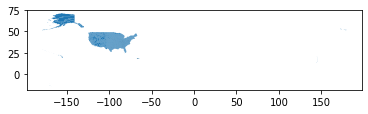

In [129]:
counties.plot()

<function print>

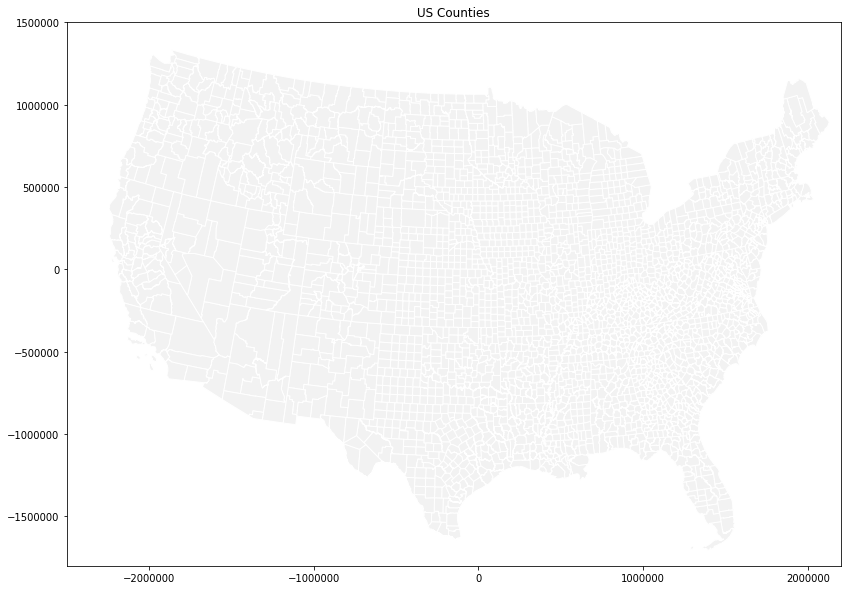

In [130]:
counties_equal = counties.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

fig, ax = plt.subplots(figsize=(20,10))
counties_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)

ax.set(xlim=(-2500000,2200000), ylim=(-1800000,1500000), title='US Counties');

print

In [131]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,,,,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01936 42.09058, -96.82367 42.090..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,,,,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.72832 46.26454, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,,,,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.89338 34.08841, -104.89248 34.2..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91094 41.04612, -96.90851 41.046..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,,,,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27357 40.35036, -98.18690 40.350..."


In [134]:
# convert GEOID column in counties df to integer before performing merge
counties_equal.GEOID = counties_equal.GEOID.astype(int)

In [135]:
pd.merge(counties_equal, age, on='GEOID', how='left')

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,geometry,name,2017_totalPop,2017_under5,2017_under18,2017_over65,2018_totalPop,2018_under5,2018_under18,2018_over65
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,,...,"POLYGON ((-79279.800 247260.708, -64060.850 24...","Cuming County, Nebraska",8964.0,570.0,2190.0,1964.0,8940.0,596.0,2211.0,1965.0
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,,...,"POLYGON ((-1983743.444 1032288.820, -1983691.9...","Wahkiakum County, Washington",4280.0,169.0,759.0,1377.0,4426.0,137.0,765.0,1424.0
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,,...,"POLYGON ((-778821.750 -657592.963, -777009.776...","De Baca County, New Mexico",1813.0,80.0,406.0,490.0,1781.0,86.0,399.0,497.0
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,"POLYGON ((-72033.348 123810.358, -71840.991 12...","Lancaster County, Nebraska",313977.0,20273.0,72105.0,42229.0,317272.0,20112.0,72512.0,44139.0
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,,...,"POLYGON ((-181739.571 43515.803, -174813.019 4...","Nuckolls County, Nebraska",4260.0,220.0,870.0,1139.0,4195.0,214.0,838.0,1137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,,...,"POLYGON ((985037.455 -545339.893, 987740.780 -...","Gilmer County, Georgia",30409.0,1701.0,5928.0,7377.0,30816.0,1658.0,5906.0,7651.0
3229,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,,...,"POLYGON ((-28042.313 1062624.351, -13495.492 1...","Roseau County, Minnesota",15311.0,940.0,3724.0,2572.0,15150.0,907.0,3651.0,2651.0
3230,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,...,"POLYGON ((537807.474 -817916.251, 545888.614 -...","Madison County, Mississippi",104632.0,6548.0,26332.0,13400.0,105630.0,6684.0,26414.0,14043.0
3231,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,,...,"POLYGON ((-509534.480 -860959.155, -504038.720...","Howard County, Texas",36198.0,2293.0,7845.0,4616.0,36459.0,2262.0,7817.0,4693.0


KeyError: '2018_totalPop'

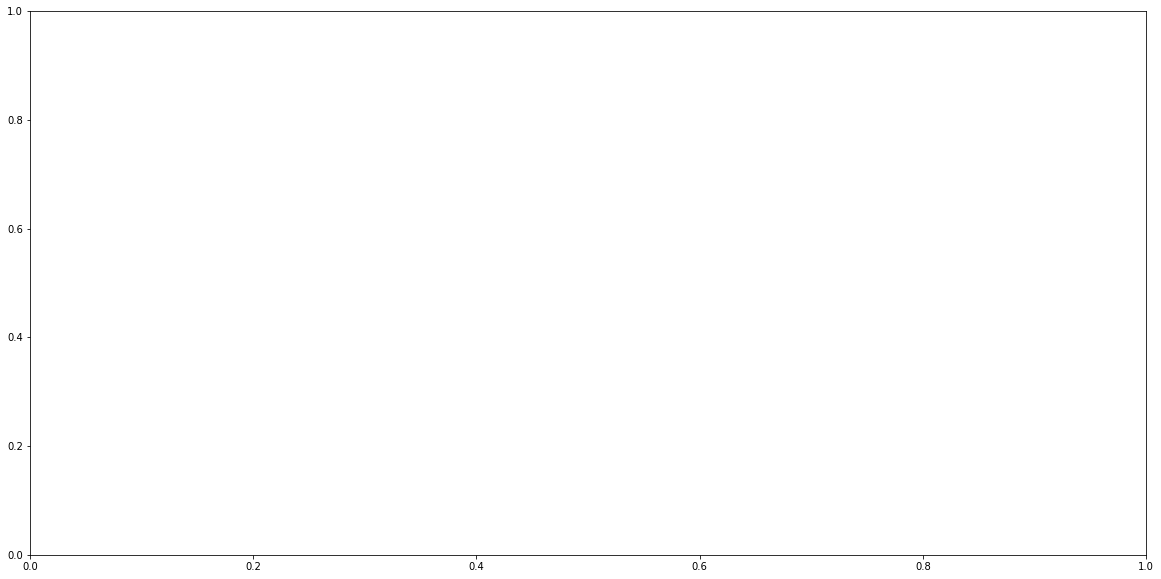

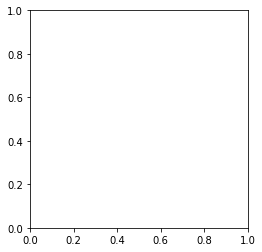

In [140]:
variable = '2018_totalPop'

fig, ax = plt.subplots(1, figsize=(20,10))
counties_equal.plot(column=variable, cmap='Blues', edgecolor='white', zorder=0)

# ax.set(xlim=(-2500000,2200000), ylim=(-1800000,1500000), title='US Counties');

print

# merged.plot(column=variable, cmap=’Blues’, linewidth=0.8, ax=ax, edgecolor=’0.8')